### Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
with open("zoo_data.csv", "r") as file:
    lines = file.readlines()

In [3]:
records = [line.strip().split(',') for line in lines]
features = [r[:-1] for r in records]
labels = [r[-1] for r in records]

mlb = MultiLabelBinarizer()
X = mlb.fit_transform(features)

le = LabelEncoder()
y = le.fit_transform(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9523809523809523


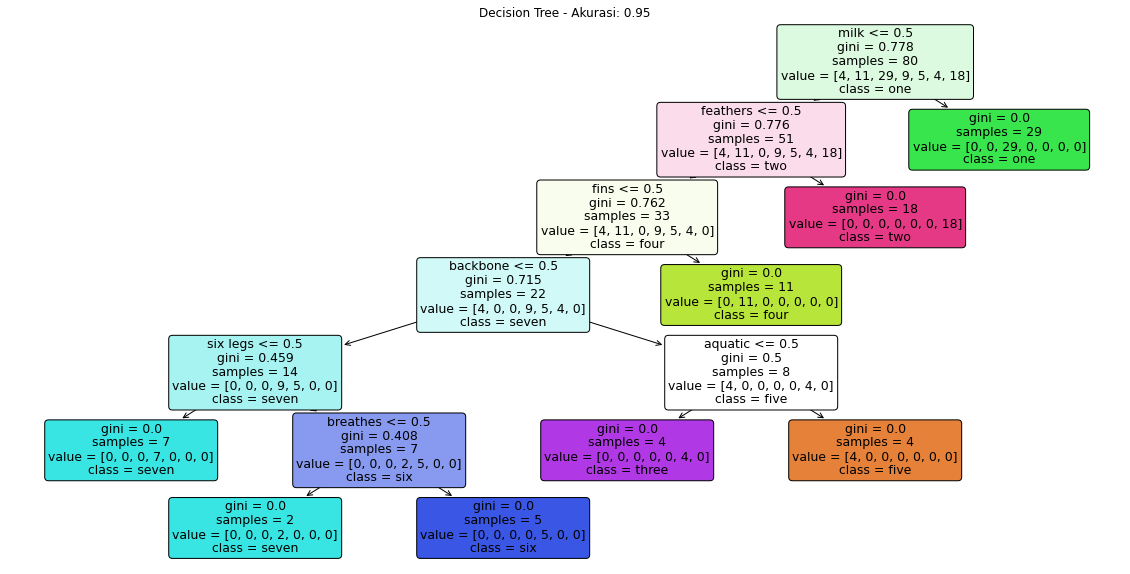

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=mlb.classes_, class_names=le.classes_, filled=True, rounded=True)
plt.title(f"Decision Tree - Akurasi: {accuracy:.2f}")
plt.show()